# Análise de dados com Pandas e Seaborn

O Pandas é uma biblioteca Python de código aberto para análise de dados. Ela fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Já o Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sua vantagem sobre o Matplotlib puro é que Seaborn fornece padrões de plotagem estatística que podem ser facilmente ativados com apenas alguns comandos.

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn.head()


,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,...,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,7590-VHVEG,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,3668-QPYBK,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,7795-CFOCW,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,...,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,9237-HQITU,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


In [41]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   genero                        7043 non-null   object 
 2   idoso                         7043 non-null   object 
 3   tem_parceiro                  7043 non-null   object 
 4   tem_dependentes               7043 non-null   object 
 5   meses_na_empresa              7043 non-null   int64  
 6   servico_telefone              7043 non-null   object 
 7   multiplas_linhas              7043 non-null   object 
 8   servico_internet              7043 non-null   object 
 9   servico_seguranca             7043 non-null   object 
 10  servico_backup                7043 non-null   object 
 11  servico_protecao_equipamento  7043 non-null   object 
 12  servico_suporte_tecnico       7043 non-null   object 
 13  str

In [42]:
df_churn.describe()

,meses_na_empresa,valor_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [43]:
df_churn.describe(exclude='number')

,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Masculino,Não,Não,Não,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,Não
freq,1,3555,5901,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


In [44]:
df_churn['churn'].value_counts()

churn
Não    5174
Sim    1869
Name: count, dtype: int64

In [45]:
df_churn['churn'].value_counts(normalize=True)*100

churn
Não    73.463013
Sim    26.536987
Name: proportion, dtype: float64

In [46]:
df_churn = df_churn.drop(columns='id_cliente', axis=1)
df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


In [47]:
colunas_num = df_churn.select_dtypes(include='number').columns
print(colunas_num)

Index(['meses_na_empresa', 'valor_mensal', 'total_gasto'], dtype='object')


In [48]:
colunas_cat = df_churn.select_dtypes(exclude='number').columns
print(colunas_cat)

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento', 'churn'],
      dtype='object')


array([[<Axes: title={'center': 'meses_na_empresa'}>,
        <Axes: title={'center': 'valor_mensal'}>,
        <Axes: title={'center': 'total_gasto'}>]], dtype=object)

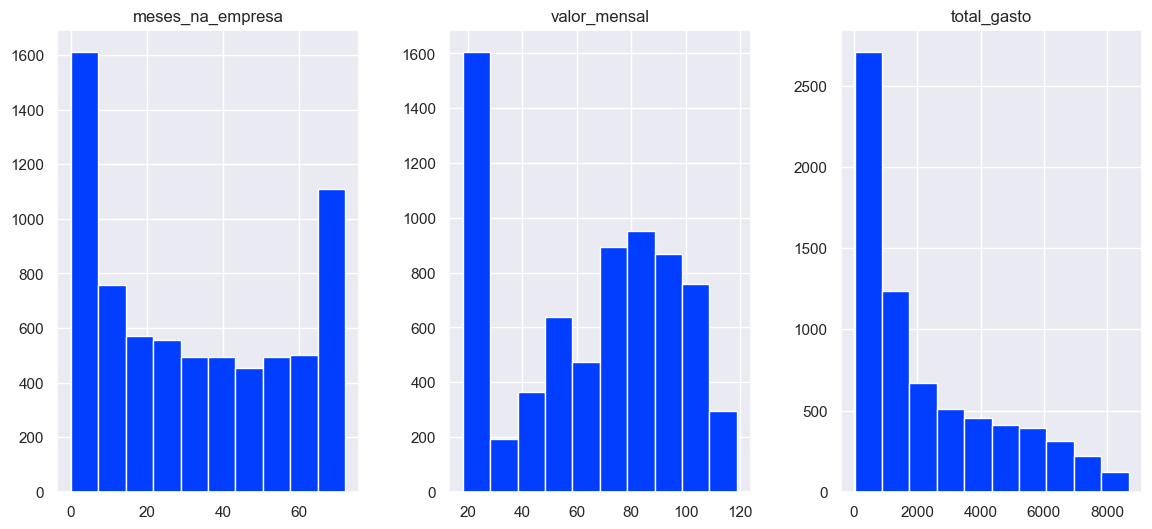

In [49]:
df_churn[colunas_num].hist(layout=(1,3), figsize=(14,6))

<Axes: xlabel='count', ylabel='Count'>

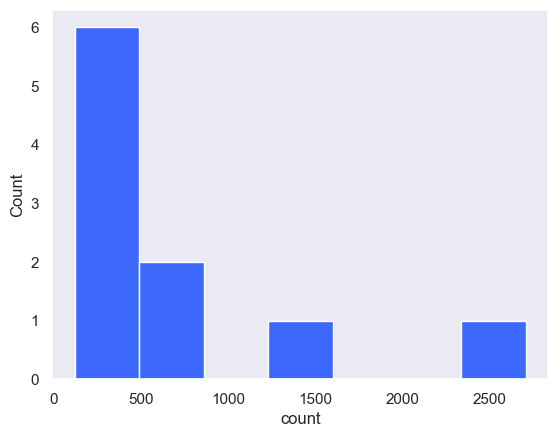

In [50]:
graf2 = df_churn['total_gasto'].value_counts(bins=10).sort_index()
sns.histplot(graf2)

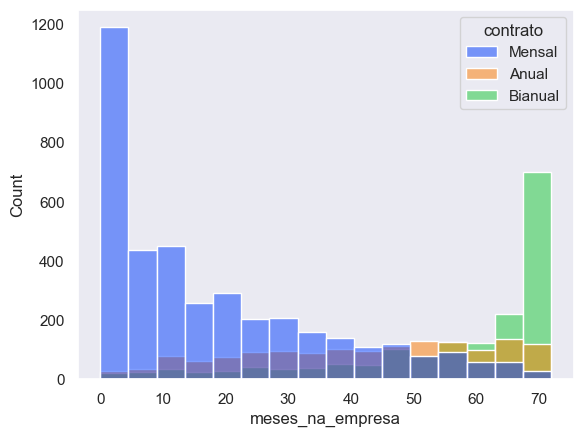

In [52]:
sns.set_theme(style='dark', palette='bright', context='notebook')
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato');

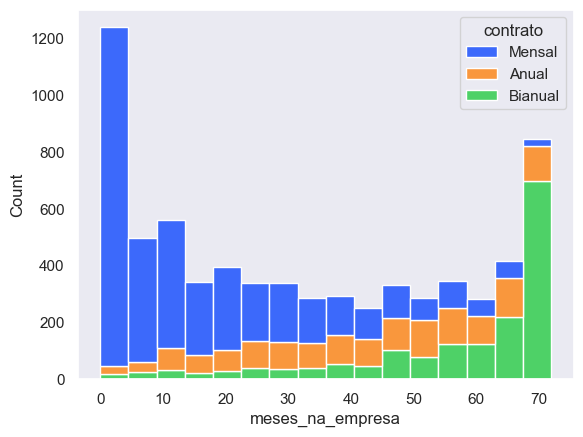

In [60]:
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato', multiple='stack');

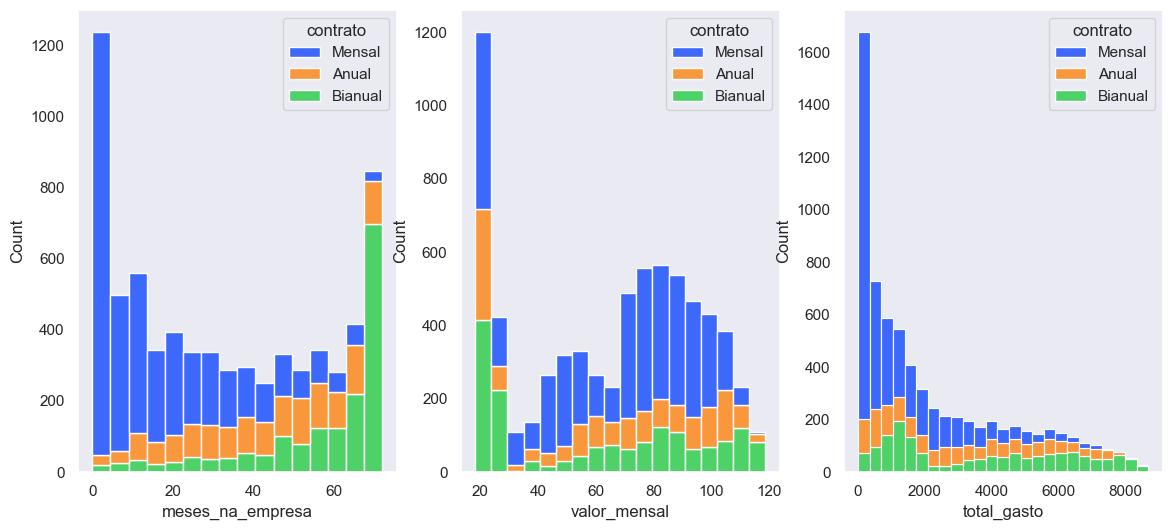

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,6))

for i, coluna in enumerate(colunas_num):
    sns.histplot( x=coluna, data=df_churn, hue='contrato', multiple='stack', ax=axs[i])

plt.show()